<a href="https://colab.research.google.com/github/MinhDat13/Bai_tap_AI/blob/main/AI_W9_HW_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


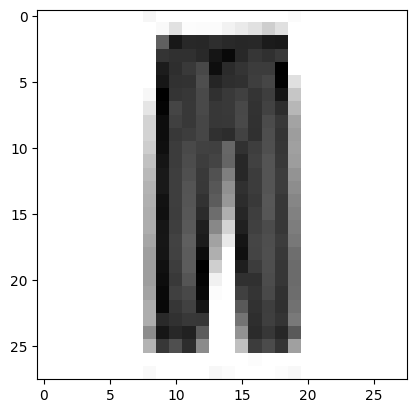

so:  1


In [ ]:
import matplotlib.pyplot as plt
digit = x_train[21]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('so: ', y_train[21])

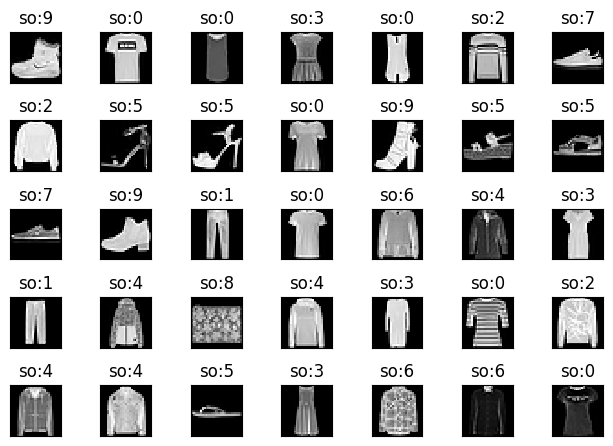

In [ ]:
for i in range(35):
  plt.subplot(5,7,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(700,activation='relu',input_shape=(28*28,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 700)               549500    
                                                                 
 dense_13 (Dense)            (None, 500)               350500    
                                                                 
 dense_14 (Dense)            (None, 300)               150300    
                                                                 
 dense_15 (Dense)            (None, 100)               30100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1,081,410
Trainable params: 1,081,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = x_test
Y = y_test

In [ ]:
x_train = x_train.reshape(60000,28*28) 
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('mat mat:',test_loss)
print('do chinh xac:',test_acc)

Epoch 1/10
469/469 [==============================] - 16s 31ms/step - loss: 0.5903 - accuracy: 0.7800
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.3964 - accuracy: 0.8534
Epoch 3/10
469/469 [==============================] - 14s 31ms/step - loss: 0.3483 - accuracy: 0.8712
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.3189 - accuracy: 0.8816
Epoch 5/10
469/469 [==============================] - 16s 34ms/step - loss: 0.2997 - accuracy: 0.8869
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.2806 - accuracy: 0.8942
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.2693 - accuracy: 0.8977
Epoch 8/10
469/469 [==============================] - 14s 30ms/step - loss: 0.2587 - accuracy: 0.9035
Epoch 9/10
469/469 [==============================] - 15s 31ms/step - loss: 0.2471 - accuracy: 0.9073
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.3323 

In [ ]:
model.save('fashion.h5')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import load_img, img_to_array
from keras.models import load_model
img=load_img('giay.jpg',grayscale=True,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,28*28)
img=img.astype('float32')
img=img/255
model=load_model('fashion.h5')
np.argmax(model.predict(img),axis=-1)

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


FileNotFoundError: ignored